# AI5-P2
## This is project No.5 and the aim of this project is using neural networks to recognize the English alphabet based on their image.

### Introduction
In this project, we must create a Forward Feed network with the help of Keras interface, which includes at least two hidden layers, and our network must have at least 4 layers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_lowercase

from tensorflow.keras import *
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
! pip install keras-metrics
from keras_metrics import precision, recall, f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ALPHABET = list(ascii_lowercase)
FIXED_SIZE = 28

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Phase One: Data review and preprocessing
-------------------------

### Q: Read csv data using pandas library.

In [2]:
df = pd.read_csv('drive/MyDrive/A_Z Handwritten Data.csv')
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
d = dict.fromkeys(df.select_dtypes(np.int64).columns, np.uint8)
df = df.astype(d)
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Q: Separate the data and the corresponding label of each of them and store them properly.

In [4]:
y = pd.get_dummies(df['0'], columns=['0'])
y = y.set_axis(ALPHABET, axis=1, inplace=False)
y

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X = df.drop('0',axis=1)
X

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Q: Convert data to 28 by 28 scale images.

In [6]:
y = y.values
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [7]:
X = X.values.reshape(-1,FIXED_SIZE,FIXED_SIZE)
X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Q: Print the number of data read and the number of available classes.

In [8]:
class_number = len(y[0])
data_number = len(y)
data_number, class_number

(372450, 26)

### Q: Calculate the number of images in each class and draw a bar graph for it.

In [9]:
y.sum(axis=0)

array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076],
      dtype=uint64)

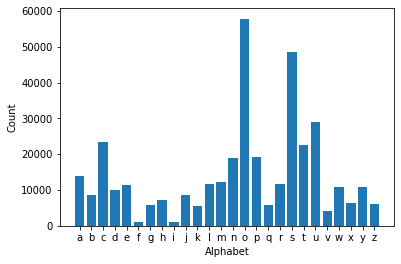

In [10]:
plt.bar(ALPHABET, y.sum(axis=0));
plt.xlabel("Alphabet")
plt.ylabel("Count")
plt.show()

### Q: From each available class, show only one image.

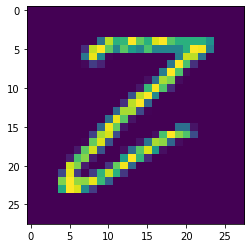

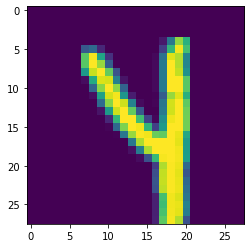

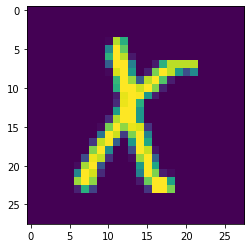

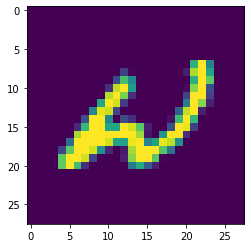

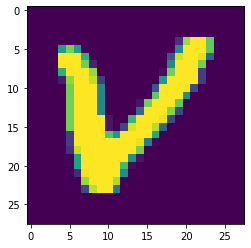

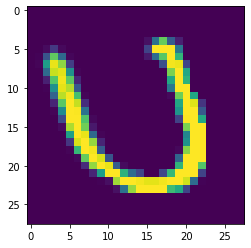

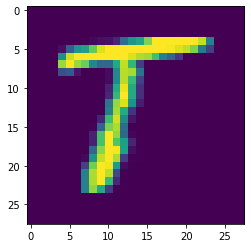

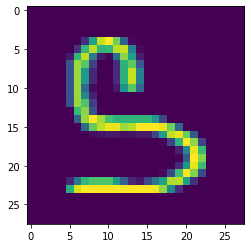

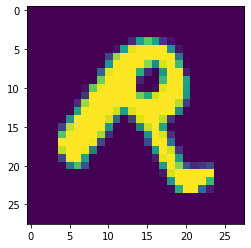

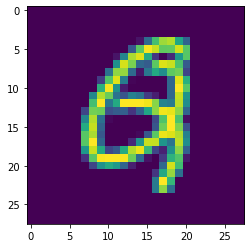

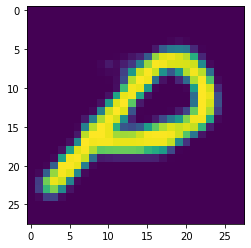

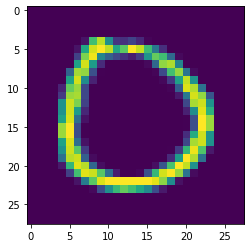

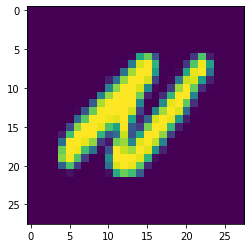

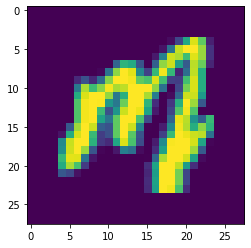

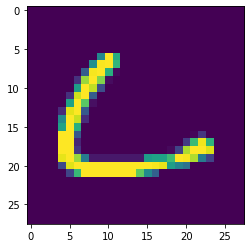

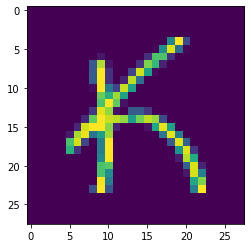

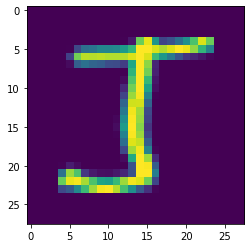

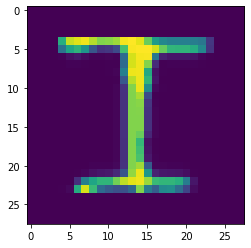

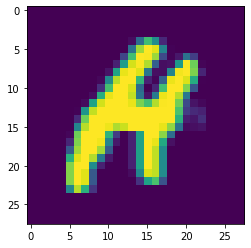

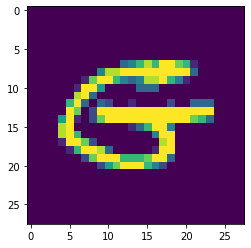

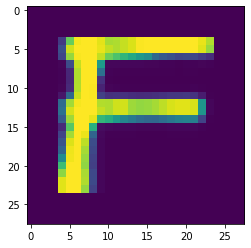

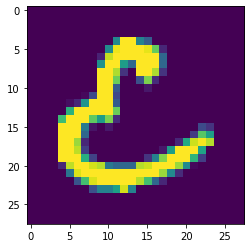

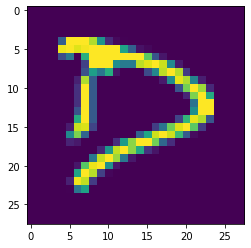

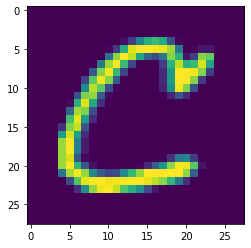

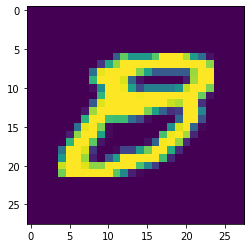

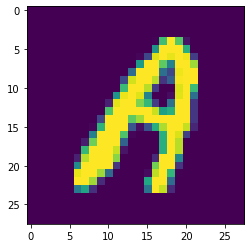

In [11]:
unique_array, unique_index = np.unique(y, axis=0, return_index=True)
for index in unique_index:
    plt.imshow(X[index])
    plt.show()

### Q: Divide the database into two sections, train and test, with the appropriate scale.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
len(X_train), len(y_train), len(X_test), len(y_test)

(249541, 249541, 122909, 122909)

In [13]:
import gc
del [[X, y, df, d, unique_array, unique_index]]
gc.collect()

30352

### Q: Encoding Hot One for tags and explaining why.
We do this to separate data to 26 class for 26 alphabet characters. The first column of `df` shows the output that are 26 different amounts. The output layer has 26 neurons; because of 26 classes  that our data can have.

# Phase Two: Neural network design
-------------------------

### Normalize X

In [14]:
X_train = X_train/255
X_test = X_test/255

### Design An NN
Output number should equal to the distinct classes that our data have. For input, for output number of flatten, I choose 50 because of 39250 parameters in layer one and 50*784 will equal to 39200

In [15]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)

In [16]:
model = models.Model(inputs=input, outputs=output)

In [17]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 30)                1230      
                                                                 
 dense_3 (Dense)             (None, 26)                806       
                                                                 
Total params: 43,326
Trainable params: 43,326
Non-trainable p

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 33s 4ms/step - loss: 0.8512 - accuracy: 0.7611 - precision: 0.7339 - recall: 0.3253 - f1_score: 0.4293 - val_loss: 0.4583 - val_accuracy: 0.8708 - val_precision: 0.8572 - val_recall: 0.5884 - val_f1_score: 0.6977
Epoch 2/10
7799/7799 [==============================] - 22s 3ms/step - loss: 0.3578 - accuracy: 0.9011 - precision: 0.8708 - recall: 0.6559 - f1_score: 0.7480 - val_loss: 0.3138 - val_accuracy: 0.9119 - val_precision: 0.8810 - val_recall: 0.7023 - val_f1_score: 0.7816
Epoch 3/10
7799/7799 [==============================] - 26s 3ms/step - loss: 0.2717 - accuracy: 0.9244 - precision: 0.8891 - recall: 0.7306 - f1_score: 0.8021 - val_loss: 0.2479 - val_accuracy: 0.9303 - val_precision: 0.8955 - val_recall: 0.7571 - val_f1_score: 0.8205
Epoch 4/10
7799/7799 [==============================] - 26s 3ms/step - loss: 0.2262 - accuracy: 0.9370 - precision: 0.9006 - recall: 0.7767 - f1_score: 0.8340 - val_loss: 0.2423 - val_accuracy: 0.9322 - v

In [20]:
def draw_accuracy_diagram_of_history(curr_history):
  plt.plot(curr_history.history['accuracy'])
  plt.plot(curr_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

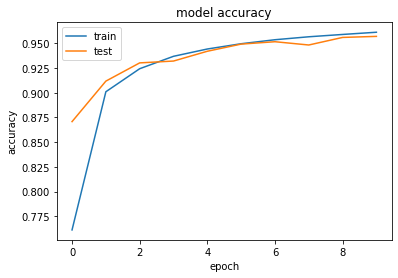

In [21]:
draw_accuracy_diagram_of_history(history)

In [22]:
def draw_loss_diagram_of_history(curr_history):
  plt.plot(curr_history.history['loss'])
  plt.plot(curr_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

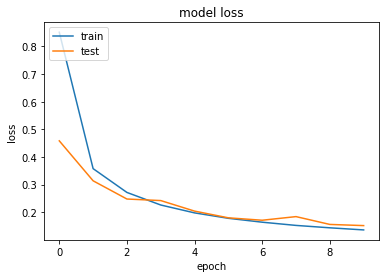

In [23]:
draw_loss_diagram_of_history(history)  

In [24]:
def calculate_metrics(data_X, data_y):
  y_pred = model.predict(data_X)
  y_pred = y_pred.argmax(axis = 1)
  print(classification_report(data_y.argmax(axis = 1), y_pred))

In [25]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4577
           1       0.88      0.95      0.91      2860
           2       0.97      0.96      0.97      7725
           3       0.93      0.87      0.90      3344
           4       0.93      0.93      0.93      3775
           5       0.95      0.85      0.90       384
           6       0.91      0.88      0.90      1901
           7       0.92      0.90      0.91      2382
           8       0.82      0.93      0.87       370
           9       0.96      0.88      0.92      2803
          10       0.91      0.91      0.91      1849
          11       0.98      0.96      0.97      3823
          12       0.95      0.97      0.96      4071
          13       0.95      0.95      0.95      6273
          14       0.97      0.99      0.98     19082
          15       0.97      0.97      0.97      6383
          16       0.93      0.89      0.91      1918
          17       0.92    

In [26]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9292
           1       0.90      0.96      0.93      5808
           2       0.98      0.97      0.97     15684
           3       0.95      0.89      0.92      6790
           4       0.94      0.94      0.94      7665
           5       0.96      0.87      0.91       779
           6       0.93      0.91      0.92      3861
           7       0.94      0.91      0.92      4836
           8       0.87      0.94      0.90       750
           9       0.97      0.89      0.93      5690
          10       0.92      0.92      0.92      3754
          11       0.98      0.97      0.97      7763
          12       0.95      0.97      0.96      8265
          13       0.96      0.95      0.96     12737
          14       0.97      0.99      0.98     38743
          15       0.98      0.97      0.98     12958
          16       0.95      0.89      0.92      3894
          17       0.93    

In [27]:
del [[model, history, input, output]]
gc.collect()

7727

# Phase Three: Data classification
-------------------------

## Part1: Optimizer effect

### Q: Investigate what momentum is and why it is useful to use it in the train phase.
Momentum is an extension to the gradient descent optimization algorithm that allows the search to build inertia in a direction in the search space and overcome the oscillations of noisy gradients and coast across flat spots of the search space. It is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.



### Practice the model with momentum 5.0, 9.0 and 98.0 and interpret the results.
Acoording to `calculate_metrics()`, with smaller numbers of beta, the new sequence turns out to be fluctuating a lot, because we’re averaging over smaller number of examples and therefore are ‘closer’ to the noisy data. With bigger values of beta, like beta=0.98, we get much smother curve, but it’s a little bit shifted to the right, because we average over larger number of example(beta=0.98). Beta = 0.9 provides a good balance between these two extremes.

### momentum=0.5

In [28]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 28s 3ms/step - loss: 0.6121 - accuracy: 0.8276 - precision: 0.7948 - recall: 0.4708 - f1_score: 0.5723 - val_loss: 0.3002 - val_accuracy: 0.9166 - val_precision: 0.8852 - val_recall: 0.7198 - val_f1_score: 0.7939
Epoch 2/10
7799/7799 [==============================] - 26s 3ms/step - loss: 0.2544 - accuracy: 0.9293 - precision: 0.9008 - recall: 0.7776 - f1_score: 0.8346 - val_loss: 0.2458 - val_accuracy: 0.9313 - val_precision: 0.9131 - val_recall: 0.8120 - val_f1_score: 0.8596
Epoch 3/10
7799/7799 [==============================] - 26s 3ms/step - loss: 0.2013 - accuracy: 0.9433 - precision: 0.9202 - recall: 0.8319 - f1_score: 0.8738 - val_loss: 0.2664 - val_accuracy: 0.9218 - val_precision: 0.9246 - val_recall: 0.8509 - val_f1_score: 0.8862
Epoch 4/10
7799/7799 [==============================] - 26s 3ms/step - loss: 0.1750 - accuracy: 0.9500 - precision: 0.9277 - recall: 0.8635 - f1_score: 0.8945 - val_loss: 0.1998 - val_accuracy: 0.9434 - v

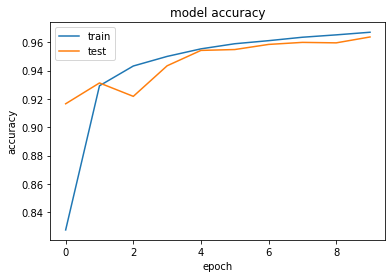

In [29]:
draw_accuracy_diagram_of_history(history)

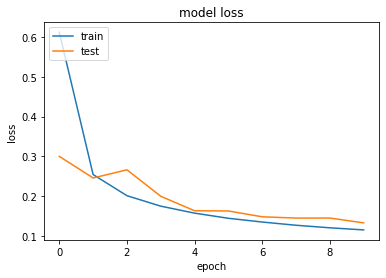

In [30]:
draw_loss_diagram_of_history(history)  

In [31]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4577
           1       0.90      0.96      0.93      2860
           2       0.96      0.98      0.97      7725
           3       0.93      0.91      0.92      3344
           4       0.96      0.95      0.96      3775
           5       0.92      0.94      0.93       384
           6       0.94      0.90      0.92      1901
           7       0.94      0.91      0.92      2382
           8       0.91      0.93      0.92       370
           9       0.95      0.93      0.94      2803
          10       0.91      0.92      0.92      1849
          11       0.97      0.96      0.97      3823
          12       0.96      0.96      0.96      4071
          13       0.96      0.94      0.95      6273
          14       0.97      0.99      0.98     19082
          15       0.97      0.98      0.97      6383
          16       0.95      0.88      0.92      1918
          17       0.95    

In [32]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9292
           1       0.91      0.97      0.94      5808
           2       0.97      0.98      0.98     15684
           3       0.94      0.91      0.93      6790
           4       0.96      0.96      0.96      7665
           5       0.91      0.93      0.92       779
           6       0.96      0.91      0.93      3861
           7       0.95      0.93      0.94      4836
           8       0.93      0.93      0.93       750
           9       0.95      0.94      0.95      5690
          10       0.94      0.95      0.94      3754
          11       0.98      0.97      0.98      7763
          12       0.97      0.97      0.97      8265
          13       0.97      0.96      0.96     12737
          14       0.98      0.99      0.98     38743
          15       0.97      0.98      0.98     12958
          16       0.97      0.92      0.94      3894
          17       0.96    

In [33]:
del [[model, history, input, output]]
gc.collect()

9025

### momentum=0.9

In [34]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 23s 3ms/step - loss: 0.3790 - accuracy: 0.8918 - precision: 0.8431 - recall: 0.6860 - f1_score: 0.7478 - val_loss: 0.2412 - val_accuracy: 0.9301 - val_precision: 0.9041 - val_recall: 0.8304 - val_f1_score: 0.8657
Epoch 2/10
7799/7799 [==============================] - 22s 3ms/step - loss: 0.1901 - accuracy: 0.9447 - precision: 0.9168 - recall: 0.8544 - f1_score: 0.8845 - val_loss: 0.1785 - val_accuracy: 0.9491 - val_precision: 0.9257 - val_recall: 0.8779 - val_f1_score: 0.9012
Epoch 3/10
7799/7799 [==============================] - 26s 3ms/step - loss: 0.1608 - accuracy: 0.9534 - precision: 0.9308 - recall: 0.8917 - f1_score: 0.9108 - val_loss: 0.1552 - val_accuracy: 0.9562 - val_precision: 0.9346 - val_recall: 0.9011 - val_f1_score: 0.9175
Epoch 4/10
7799/7799 [==============================] - 27s 3ms/step - loss: 0.1424 - accuracy: 0.9583 - precision: 0.9377 - recall: 0.9079 - f1_score: 0.9226 - val_loss: 0.1589 - val_accuracy: 0.9535 - v

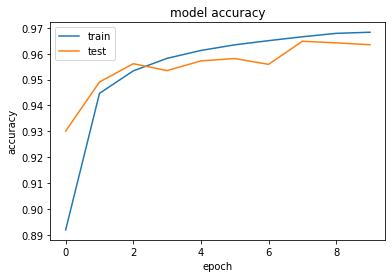

In [35]:
draw_accuracy_diagram_of_history(history)

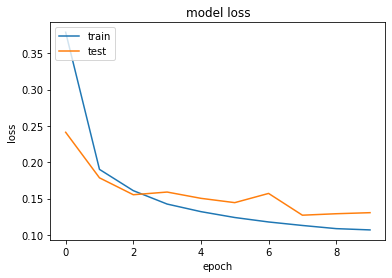

In [36]:
draw_loss_diagram_of_history(history)  

In [37]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4577
           1       0.95      0.94      0.95      2860
           2       0.97      0.97      0.97      7725
           3       0.89      0.94      0.91      3344
           4       0.92      0.97      0.94      3775
           5       0.94      0.89      0.92       384
           6       0.89      0.94      0.91      1901
           7       0.94      0.93      0.93      2382
           8       0.93      0.91      0.92       370
           9       0.93      0.95      0.94      2803
          10       0.94      0.91      0.92      1849
          11       0.98      0.96      0.97      3823
          12       0.98      0.96      0.97      4071
          13       0.96      0.96      0.96      6273
          14       0.99      0.96      0.98     19082
          15       0.96      0.98      0.97      6383
          16       0.89      0.94      0.92      1918
          17       0.97    

In [38]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9292
           1       0.97      0.97      0.97      5808
           2       0.97      0.98      0.98     15684
           3       0.91      0.95      0.93      6790
           4       0.93      0.98      0.95      7665
           5       0.95      0.92      0.93       779
           6       0.92      0.96      0.94      3861
           7       0.95      0.94      0.95      4836
           8       0.97      0.93      0.95       750
           9       0.95      0.96      0.96      5690
          10       0.96      0.94      0.95      3754
          11       0.99      0.96      0.98      7763
          12       0.98      0.97      0.98      8265
          13       0.97      0.97      0.97     12737
          14       0.99      0.96      0.98     38743
          15       0.97      0.99      0.98     12958
          16       0.91      0.96      0.94      3894
          17       0.98    

In [39]:
del [[model, history, input, output]]
gc.collect()

9212

### momentum=0.98

In [40]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.98), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 28s 3ms/step - loss: 0.6043 - accuracy: 0.8418 - precision: 0.7944 - recall: 0.6152 - f1_score: 0.6863 - val_loss: 0.5307 - val_accuracy: 0.8693 - val_precision: 0.8560 - val_recall: 0.7397 - val_f1_score: 0.7936
Epoch 2/10
7799/7799 [==============================] - 22s 3ms/step - loss: 0.4484 - accuracy: 0.8940 - precision: 0.8698 - recall: 0.7587 - f1_score: 0.8105 - val_loss: 0.4262 - val_accuracy: 0.9023 - val_precision: 0.8783 - val_recall: 0.7743 - val_f1_score: 0.8230
Epoch 3/10
7799/7799 [==============================] - 27s 3ms/step - loss: 0.4174 - accuracy: 0.9062 - precision: 0.8829 - recall: 0.7835 - f1_score: 0.8303 - val_loss: 0.4102 - val_accuracy: 0.9190 - val_precision: 0.8863 - val_recall: 0.7991 - val_f1_score: 0.8404
Epoch 4/10
7799/7799 [==============================] - 27s 3ms/step - loss: 0.4170 - accuracy: 0.9102 - precision: 0.8888 - recall: 0.8100 - f1_score: 0.8476 - val_loss: 0.4922 - val_accuracy: 0.9133 - v

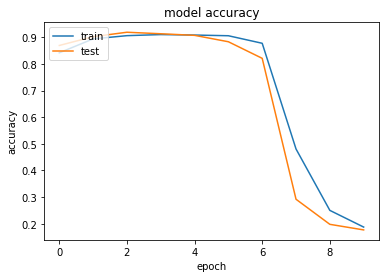

In [41]:
draw_accuracy_diagram_of_history(history)

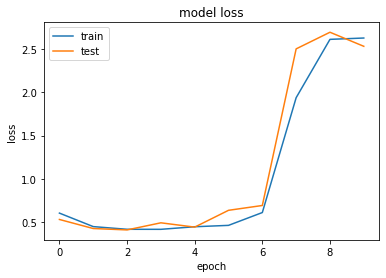

In [42]:
draw_loss_diagram_of_history(history)  

In [43]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.14      0.00      0.00      4577
           1       0.00      0.00      0.00      2860
           2       0.00      0.00      0.00      7725
           3       0.00      0.00      0.00      3344
           4       0.00      0.00      0.00      3775
           5       0.00      0.00      0.00       384
           6       0.00      0.00      0.00      1901
           7       0.00      0.00      0.00      2382
           8       0.00      0.00      0.00       370
           9       0.00      0.00      0.00      2803
          10       0.00      0.00      0.00      1849
          11       0.00      0.00      0.00      3823
          12       0.00      0.00      0.00      4071
          13       0.00      0.00      0.00      6273
          14       0.00      0.00      0.00     19082
          15       0.14      0.92      0.25      6383
          16       0.00      0.00      0.00      1918
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
calculate_metrics(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.11      0.00      0.00      9292
           1       0.00      0.00      0.00      5808
           2       0.00      0.00      0.00     15684
           3       0.00      0.00      0.00      6790
           4       0.00      0.00      0.00      7665
           5       0.00      0.00      0.00       779
           6       0.00      0.00      0.00      3861
           7       0.00      0.00      0.00      4836
           8       0.00      0.00      0.00       750
           9       0.00      0.00      0.00      5690
          10       0.00      0.00      0.00      3754
          11       0.00      0.00      0.00      7763
          12       0.00      0.00      0.00      8265
          13       0.00      0.00      0.00     12737
          14       0.00      0.00      0.00     38743
          15       0.14      0.92      0.25     12958
          16       0.00      0.00      0.00      3894
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
del [[model, history, input, output]]
gc.collect()

9074

###Q: Does the result always improve with increasing momentum? Explain.
If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step.

### Q: One of the most popular optimizers used in the modeling process is `Adam`. Practice your model using Adam and compare the result with the previous step SGD.

The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

<b>Adam has better result than the previous step SGD.</b>

In [46]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 30s 4ms/step - loss: 0.3808 - accuracy: 0.8931 - precision: 0.8540 - recall: 0.6718 - f1_score: 0.7429 - val_loss: 0.2185 - val_accuracy: 0.9391 - val_precision: 0.9088 - val_recall: 0.8445 - val_f1_score: 0.8754
Epoch 2/10
7799/7799 [==============================] - 29s 4ms/step - loss: 0.1921 - accuracy: 0.9454 - precision: 0.9173 - recall: 0.8752 - f1_score: 0.8957 - val_loss: 0.1737 - val_accuracy: 0.9503 - val_precision: 0.9262 - val_recall: 0.8906 - val_f1_score: 0.9081
Epoch 3/10
7799/7799 [==============================] - 24s 3ms/step - loss: 0.1595 - accuracy: 0.9543 - precision: 0.9318 - recall: 0.8984 - f1_score: 0.9148 - val_loss: 0.1660 - val_accuracy: 0.9530 - val_precision: 0.9348 - val_recall: 0.9072 - val_f1_score: 0.9208
Epoch 4/10
7799/7799 [==============================] - 24s 3ms/step - loss: 0.1418 - accuracy: 0.9589 - precision: 0.9367 - recall: 0.9131 - f1_score: 0.9247 - val_loss: 0.1521 - val_accuracy: 0.9563 - v

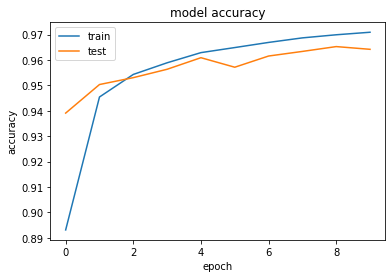

In [47]:
draw_accuracy_diagram_of_history(history)

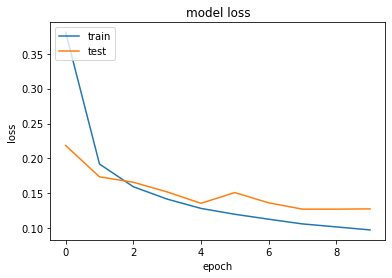

In [48]:
draw_loss_diagram_of_history(history)  

In [49]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4577
           1       0.92      0.95      0.94      2860
           2       0.93      0.99      0.96      7725
           3       0.90      0.94      0.92      3344
           4       0.98      0.94      0.96      3775
           5       0.94      0.94      0.94       384
           6       0.91      0.94      0.92      1901
           7       0.95      0.92      0.93      2382
           8       0.87      0.93      0.90       370
           9       0.92      0.96      0.94      2803
          10       0.92      0.93      0.92      1849
          11       0.97      0.97      0.97      3823
          12       0.96      0.97      0.96      4071
          13       0.97      0.95      0.96      6273
          14       0.99      0.96      0.97     19082
          15       0.98      0.97      0.98      6383
          16       0.89      0.94      0.91      1918
          17       0.98    

In [50]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9292
           1       0.93      0.97      0.95      5808
           2       0.94      0.99      0.97     15684
           3       0.92      0.96      0.94      6790
           4       0.99      0.95      0.97      7665
           5       0.94      0.97      0.95       779
           6       0.93      0.96      0.94      3861
           7       0.96      0.94      0.95      4836
           8       0.95      0.97      0.96       750
           9       0.95      0.97      0.96      5690
          10       0.95      0.94      0.94      3754
          11       0.98      0.98      0.98      7763
          12       0.97      0.98      0.97      8265
          13       0.98      0.97      0.97     12737
          14       0.99      0.96      0.98     38743
          15       0.99      0.98      0.98     12958
          16       0.91      0.96      0.93      3894
          17       0.98    

In [51]:
del [[model, history, input, output]]
gc.collect()

9190

## Part2: Epoch number effect

### Q: train the model with epoch=20.

In [52]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 32s 4ms/step - loss: 0.3813 - accuracy: 0.8942 - precision: 0.8445 - recall: 0.6700 - f1_score: 0.7384 - val_loss: 0.2236 - val_accuracy: 0.9352 - val_precision: 0.9107 - val_recall: 0.8212 - val_f1_score: 0.8636
Epoch 2/20
7799/7799 [==============================] - 29s 4ms/step - loss: 0.1898 - accuracy: 0.9461 - precision: 0.9228 - recall: 0.8484 - f1_score: 0.8840 - val_loss: 0.1765 - val_accuracy: 0.9505 - val_precision: 0.9295 - val_recall: 0.8703 - val_f1_score: 0.8989
Epoch 3/20
7799/7799 [==============================] - 29s 4ms/step - loss: 0.1557 - accuracy: 0.9555 - precision: 0.9350 - recall: 0.8828 - f1_score: 0.9082 - val_loss: 0.1543 - val_accuracy: 0.9568 - val_precision: 0.9370 - val_recall: 0.8944 - val_f1_score: 0.9152
Epoch 4/20
7799/7799 [==============================] - 29s 4ms/step - loss: 0.1374 - accuracy: 0.9602 - precision: 0.9386 - recall: 0.9031 - f1_score: 0.9205 - val_loss: 0.1489 - val_accuracy: 0.9584 - v

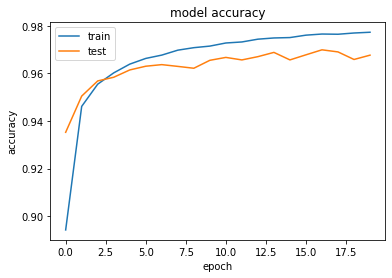

In [53]:
draw_accuracy_diagram_of_history(history)

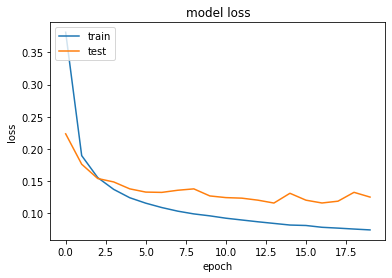

In [54]:
draw_loss_diagram_of_history(history)  

In [55]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4577
           1       0.95      0.95      0.95      2860
           2       0.97      0.98      0.98      7725
           3       0.93      0.90      0.92      3344
           4       0.98      0.94      0.96      3775
           5       0.97      0.93      0.95       384
           6       0.86      0.97      0.91      1901
           7       0.95      0.92      0.94      2382
           8       0.97      0.88      0.93       370
           9       0.96      0.91      0.93      2803
          10       0.89      0.95      0.92      1849
          11       0.98      0.96      0.97      3823
          12       0.97      0.98      0.97      4071
          13       0.97      0.96      0.97      6273
          14       0.98      0.98      0.98     19082
          15       0.98      0.97      0.98      6383
          16       0.93      0.94      0.94      1918
          17       0.98    

In [56]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      9292
           1       0.97      0.97      0.97      5808
           2       0.98      0.99      0.98     15684
           3       0.95      0.93      0.94      6790
           4       0.99      0.95      0.97      7665
           5       0.98      0.96      0.97       779
           6       0.89      0.98      0.93      3861
           7       0.97      0.95      0.96      4836
           8       0.99      0.91      0.95       750
           9       0.98      0.93      0.95      5690
          10       0.93      0.98      0.95      3754
          11       0.99      0.97      0.98      7763
          12       0.97      0.99      0.98      8265
          13       0.98      0.97      0.98     12737
          14       0.99      0.99      0.99     38743
          15       0.99      0.98      0.99     12958
          16       0.96      0.97      0.96      3894
          17       0.99    

In [57]:
del [[model, history, input, output]]
gc.collect()

9408

### Q: In all cases, is it necessary for the neural network to practice in several epochs? What is the reason for this?
An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass.

It's typical that gradient descent doesn't reach a (global or local) minimum after the first epoch. For any problem, there's no reason to believe that the number of updates required to reach a minimum happens to coincide with the number of mini-batches in your data set. It definitely needs more epochs to get the best performance. The number of epochs exceeds 100. In addition, it is better to specify simultaneously another set of epochs for cross-validation to avoid the over fitting problem.

### Q: Is it always helpful to use more epochs to train? If yes, explain why, and if so, what are the solutions to the problem?

One of the critical issues while training a neural network on the sample data is Overfitting. When the number of epochs used to train a neural network model is more than necessary, the training model learns patterns that are specific to sample data to a great extent. This makes the model incapable to perform well on a new dataset. This model gives high accuracy on the training set (sample data) but fails to achieve good accuracy on the test set. In other words, the model loses generalization capacity by overfitting to the training data.

## Part3: Function loss effect

### Q: Train neural network using the cost function known as MSE and compare the result with entropy cross categorical.

As we can see, the result for `categorical_crossentropy` is a little better than `mean_squared_error`. We can the reason in the next question.

In [58]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 32s 4ms/step - loss: 0.3823 - accuracy: 0.8929 - precision: 0.8546 - recall: 0.6677 - f1_score: 0.7389 - val_loss: 0.2236 - val_accuracy: 0.9375 - val_precision: 0.9098 - val_recall: 0.8387 - val_f1_score: 0.8728
Epoch 2/10
7799/7799 [==============================] - 27s 3ms/step - loss: 0.1891 - accuracy: 0.9472 - precision: 0.9190 - recall: 0.8680 - f1_score: 0.8927 - val_loss: 0.1756 - val_accuracy: 0.9499 - val_precision: 0.9257 - val_recall: 0.8877 - val_f1_score: 0.9063
Epoch 3/10
7799/7799 [==============================] - 32s 4ms/step - loss: 0.1549 - accuracy: 0.9559 - precision: 0.9310 - recall: 0.8998 - f1_score: 0.9151 - val_loss: 0.1570 - val_accuracy: 0.9557 - val_precision: 0.9363 - val_recall: 0.9069 - val_f1_score: 0.9213
Epoch 4/10
7799/7799 [==============================] - 32s 4ms/step - loss: 0.1366 - accuracy: 0.9612 - precision: 0.9402 - recall: 0.9127 - f1_score: 0.9263 - val_loss: 0.1558 - val_accuracy: 0.9557 - v

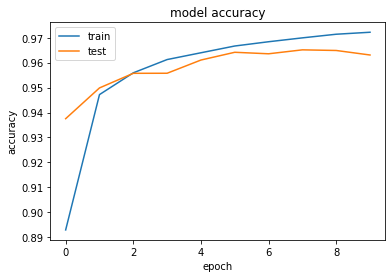

In [59]:
draw_accuracy_diagram_of_history(history)

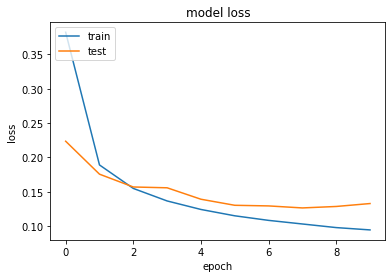

In [60]:
draw_loss_diagram_of_history(history)  

In [61]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4577
           1       0.96      0.93      0.94      2860
           2       0.97      0.97      0.97      7725
           3       0.96      0.88      0.92      3344
           4       0.95      0.96      0.96      3775
           5       0.95      0.92      0.93       384
           6       0.88      0.95      0.91      1901
           7       0.85      0.95      0.90      2382
           8       0.95      0.83      0.89       370
           9       0.93      0.94      0.93      2803
          10       0.94      0.88      0.91      1849
          11       0.97      0.97      0.97      3823
          12       0.96      0.96      0.96      4071
          13       0.98      0.92      0.95      6273
          14       0.98      0.99      0.98     19082
          15       0.98      0.97      0.98      6383
          16       0.91      0.94      0.92      1918
          17       0.96    

In [62]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9292
           1       0.98      0.95      0.96      5808
           2       0.98      0.98      0.98     15684
           3       0.97      0.91      0.93      6790
           4       0.95      0.97      0.96      7665
           5       0.96      0.94      0.95       779
           6       0.90      0.96      0.93      3861
           7       0.87      0.96      0.91      4836
           8       0.97      0.87      0.92       750
           9       0.96      0.95      0.95      5690
          10       0.97      0.90      0.93      3754
          11       0.98      0.98      0.98      7763
          12       0.96      0.97      0.97      8265
          13       0.99      0.93      0.96     12737
          14       0.98      0.99      0.98     38743
          15       0.99      0.98      0.98     12958
          16       0.93      0.95      0.94      3894
          17       0.97    

In [63]:
del [[model, history, input, output]]
gc.collect()

9259

### Q: Why not use a function like MSE for classification? When do we use this function?

Cross-entropy loss, or log loss, measure the performance of a classification model whose output is a probability value between 0 and 1. It is preferred for classification, while mean squared error (MSE) is one of the best choices for regression. This comes directly from the statement of your problems itself. In classification you work with a very particular set of possible output values thus MSE is badly defined.

## Part3: Regularization effect

### Q: Using the keras interface, apply L2 regularization to each layer with a value of 0001.0 and view and explain the result.
By regularizstion, we can decrease overfitting between train and test set. we can see this in diagram. The distance between train and test set become closer and that means we have decreased the overfitting.

In [64]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu', kernel_regularizer = regularizers.l2(0.0001))(output)
output = layers.Dense(40, activation='relu', kernel_regularizer = regularizers.l2(0.0001))(output)
output = layers.Dense(30, activation='relu', kernel_regularizer = regularizers.l2(0.0001))(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 34s 4ms/step - loss: 0.0157 - accuracy: 0.8222 - precision: 0.8092 - recall: 0.4695 - f1_score: 0.5824 - val_loss: 0.0123 - val_accuracy: 0.8812 - val_precision: 0.8770 - val_recall: 0.6560 - val_f1_score: 0.7505
Epoch 2/10
7799/7799 [==============================] - 25s 3ms/step - loss: 0.0115 - accuracy: 0.8935 - precision: 0.8835 - recall: 0.6969 - f1_score: 0.7792 - val_loss: 0.0107 - val_accuracy: 0.9030 - val_precision: 0.8946 - val_recall: 0.7212 - val_f1_score: 0.7986
Epoch 3/10
7799/7799 [==============================] - 25s 3ms/step - loss: 0.0103 - accuracy: 0.9056 - precision: 0.9013 - recall: 0.7361 - f1_score: 0.8104 - val_loss: 0.0095 - val_accuracy: 0.9158 - val_precision: 0.9064 - val_recall: 0.7498 - val_f1_score: 0.8207
Epoch 4/10
7799/7799 [==============================] - 35s 5ms/step - loss: 0.0097 - accuracy: 0.9101 - precision: 0.9098 - recall: 0.7604 - f1_score: 0.8284 - val_loss: 0.0111 - val_accuracy: 0.8832 - v

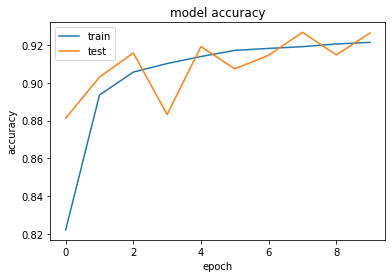

In [65]:
draw_accuracy_diagram_of_history(history)

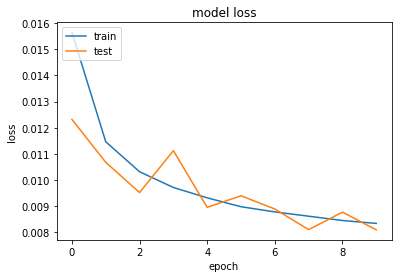

In [66]:
draw_loss_diagram_of_history(history)  

In [67]:
calculate_metrics(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4577
           1       0.85      0.88      0.86      2860
           2       0.94      0.95      0.95      7725
           3       0.91      0.83      0.87      3344
           4       0.87      0.86      0.87      3775
           5       0.00      0.00      0.00       384
           6       0.90      0.85      0.87      1901
           7       0.92      0.81      0.86      2382
           8       0.00      0.00      0.00       370
           9       0.84      0.87      0.86      2803
          10       0.88      0.79      0.84      1849
          11       0.92      0.94      0.93      3823
          12       0.91      0.93      0.92      4071
          13       0.87      0.94      0.90      6273
          14       0.96      0.98      0.97     19082
          15       0.95      0.95      0.95      6383
          16       0.87      0.86      0.86      1918
          17       0.90    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
calculate_metrics(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.88      0.91      9292
           1       0.86      0.89      0.88      5808
           2       0.94      0.96      0.95     15684
           3       0.91      0.84      0.87      6790
           4       0.87      0.87      0.87      7665
           5       0.00      0.00      0.00       779
           6       0.92      0.85      0.88      3861
           7       0.91      0.80      0.85      4836
           8       0.00      0.00      0.00       750
           9       0.86      0.88      0.87      5690
          10       0.89      0.80      0.84      3754
          11       0.92      0.94      0.93      7763
          12       0.91      0.93      0.92      8265
          13       0.87      0.95      0.91     12737
          14       0.96      0.98      0.97     38743
          15       0.96      0.95      0.96     12958
          16       0.87      0.86      0.87      3894
          17       0.90    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
del [[model, history, input, output]]
gc.collect()

9256

### Q: Use the keras interface for each dropout layer with a value of 0.1. Explain the effect of using dropout during network training and testing. Interpret the result of using this layer.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout. Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer. Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

<b>As we can see, test set works better than train set and it's fantastic:)</b>

In [70]:
input = layers.Input(shape=(FIXED_SIZE, FIXED_SIZE, 1))

output = layers.Flatten()(input)
output = layers.Dense(50, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(40, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(30, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(class_number, activation='softmax')(output)
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', precision(), recall(), f1_score()])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


7799/7799 [==============================] - 27s 3ms/step - loss: 0.6125 - accuracy: 0.8227 - precision: 0.7801 - recall: 0.4895 - f1_score: 0.5872 - val_loss: 0.2704 - val_accuracy: 0.9227 - val_precision: 0.8566 - val_recall: 0.6990 - val_f1_score: 0.7697
Epoch 2/10
7799/7799 [==============================] - 30s 4ms/step - loss: 0.3726 - accuracy: 0.8927 - precision: 0.8692 - recall: 0.7468 - f1_score: 0.8033 - val_loss: 0.2169 - val_accuracy: 0.9378 - val_precision: 0.8763 - val_recall: 0.7770 - val_f1_score: 0.8237
Epoch 3/10
7799/7799 [==============================] - 25s 3ms/step - loss: 0.3299 - accuracy: 0.9058 - precision: 0.8809 - recall: 0.7968 - f1_score: 0.8368 - val_loss: 0.2043 - val_accuracy: 0.9411 - val_precision: 0.8831 - val_recall: 0.8128 - val_f1_score: 0.8465
Epoch 4/10
7799/7799 [==============================] - 29s 4ms/step - loss: 0.3061 - accuracy: 0.9127 - precision: 0.8846 - recall: 0.8239 - f1_score: 0.8532 - val_loss: 0.1854 - val_accuracy: 0.9465 - v

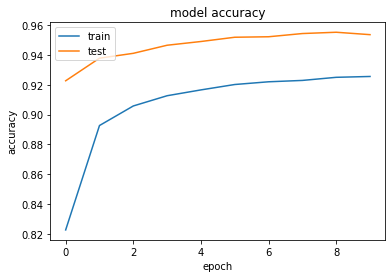

In [71]:
draw_accuracy_diagram_of_history(history)

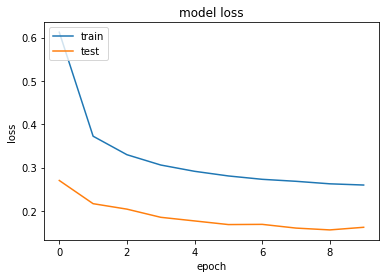

In [72]:
draw_loss_diagram_of_history(history)  

In [73]:
calculate_metrics(X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4577
           1       0.95      0.87      0.91      2860
           2       0.95      0.97      0.96      7725
           3       0.92      0.86      0.89      3344
           4       0.94      0.93      0.93      3775
           5       0.96      0.91      0.93       384
           6       0.93      0.88      0.91      1901
           7       0.92      0.89      0.91      2382
           8       0.95      0.85      0.89       370
           9       0.92      0.92      0.92      2803
          10       0.92      0.86      0.89      1849
          11       0.93      0.98      0.95      3823
          12       0.95      0.95      0.95      4071
          13       0.94      0.94      0.94      6273
          14       0.97      0.99      0.98     19082
          15       0.96      0.98      0.97      6383
          16       0.92      0.90      0.91      1918
          17       0.92    

In [74]:
calculate_metrics(X_train, y_train)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9292
           1       0.96      0.88      0.92      5808
           2       0.96      0.97      0.97     15684
           3       0.93      0.88      0.91      6790
           4       0.94      0.94      0.94      7665
           5       0.95      0.89      0.92       779
           6       0.94      0.89      0.92      3861
           7       0.93      0.89      0.91      4836
           8       0.97      0.86      0.91       750
           9       0.93      0.92      0.92      5690
          10       0.93      0.87      0.90      3754
          11       0.93      0.98      0.96      7763
          12       0.95      0.96      0.96      8265
          13       0.94      0.95      0.95     12737
          14       0.97      0.99      0.98     38743
          15       0.96      0.98      0.97     12958
          16       0.93      0.91      0.92      3894
          17       0.93    

In [75]:
del [[model, history, input, output]]
gc.collect()

9179